In [1]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import math
from scipy import stats
from sklearn import linear_model
from src.utils.analysis_movies_function import extract_us_nonus, get_all_genre,  get_movies_genre_change, plot_movies_genre_change, plot_percentage_movies_genre_all, linear_regression_plot, plot_per_continent,get_country_dataset, continent_data
from src.utils.analysis_plots_function import count_key_words, plot_key_words_occ, percentage_key_words_before_after, plot_key_words_occ_zoomed


# Loading the data

All the raw data preprocessing, and basic analysis can be found in the jupyter notebook `src/utils/preprocessing.ipynb`. 
In the preprocessing, we did several things: 
- We removed outliers from the dataset (example: a movie with several years of runtime...)
- We transformed data in a more useful way (example: string date to datetime, dict to list...)
- We added new columns from the existing ones and infered some values based on the majority of the data 
- We matched the cleaned ethnicity ID with another dataset to get meaningful ethnicities 

The raw datasets are in `/src/data` and the cleaned and formated datasets are then saved as pkl files in `/data`

In [2]:
movies = pd.read_pickle('data/movies.pkl')
tvtropes = pd.read_pickle('data/tvtropes.pkl')
plot_summaries = pd.read_pickle('data/plot_summaries.pkl')

### US selection

In [3]:
us_movies,nonus_movies = extract_us_nonus(movies)
genres_unique = get_all_genre(movies)

# 9/11 US

The genres with the highest change are social issues, horror, political cinema

In [4]:
df = get_movies_genre_change(us_movies, genres_unique, -1 , 1997,  2002,2006)

We notice here that the distribution of genres is right skewed, with a maximum percentage lower than 10% and a median around 0.03%. We should keep this in mind when we will the percentage and the focus should be more on the change than the absolute value

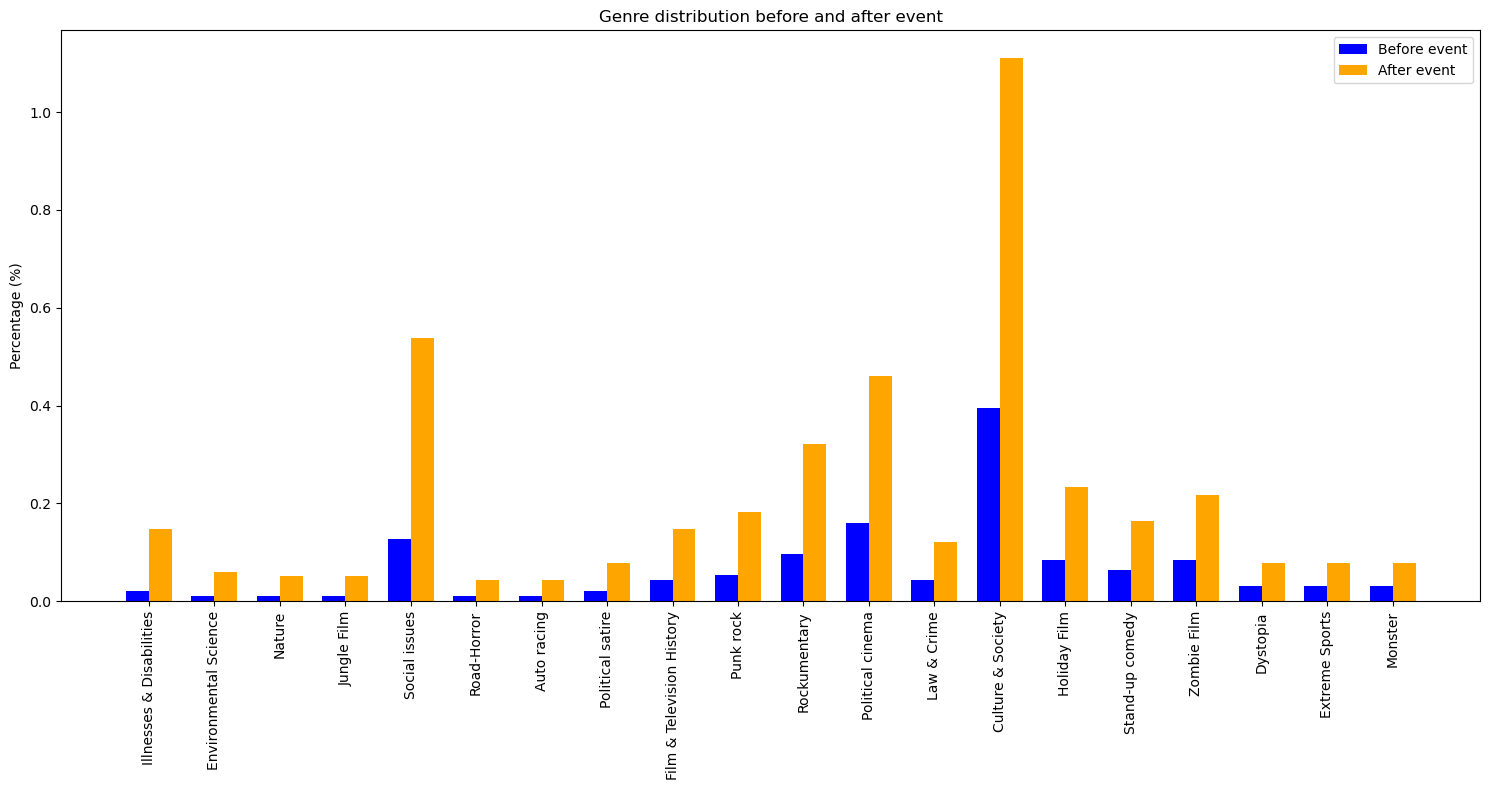

t-statistic: -2.3999224911889345
p-value: 0.021405089343880673


In [7]:
#to get the genre the most impacted, we will choose a small time range to limit cofounding factors
df = get_movies_genre_change(us_movies, genres_unique, 20, 1997,  2002,2006)
plot_movies_genre_change(df)
t_statistic, p_value = stats.ttest_ind(df.count_before, df.count_after)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

for the 20 genres the most changing, there is a significant difference 

In [8]:
# from these 20 genres we focus on the ones linked to politics and social 
genres = ['Social issues', 'Road-Horror','Political satire', 'Film & Television History','Political cinema', 'Law & Crime',
       'Culture & Society','Zombie Film', 'Dystopia', 'Monster']

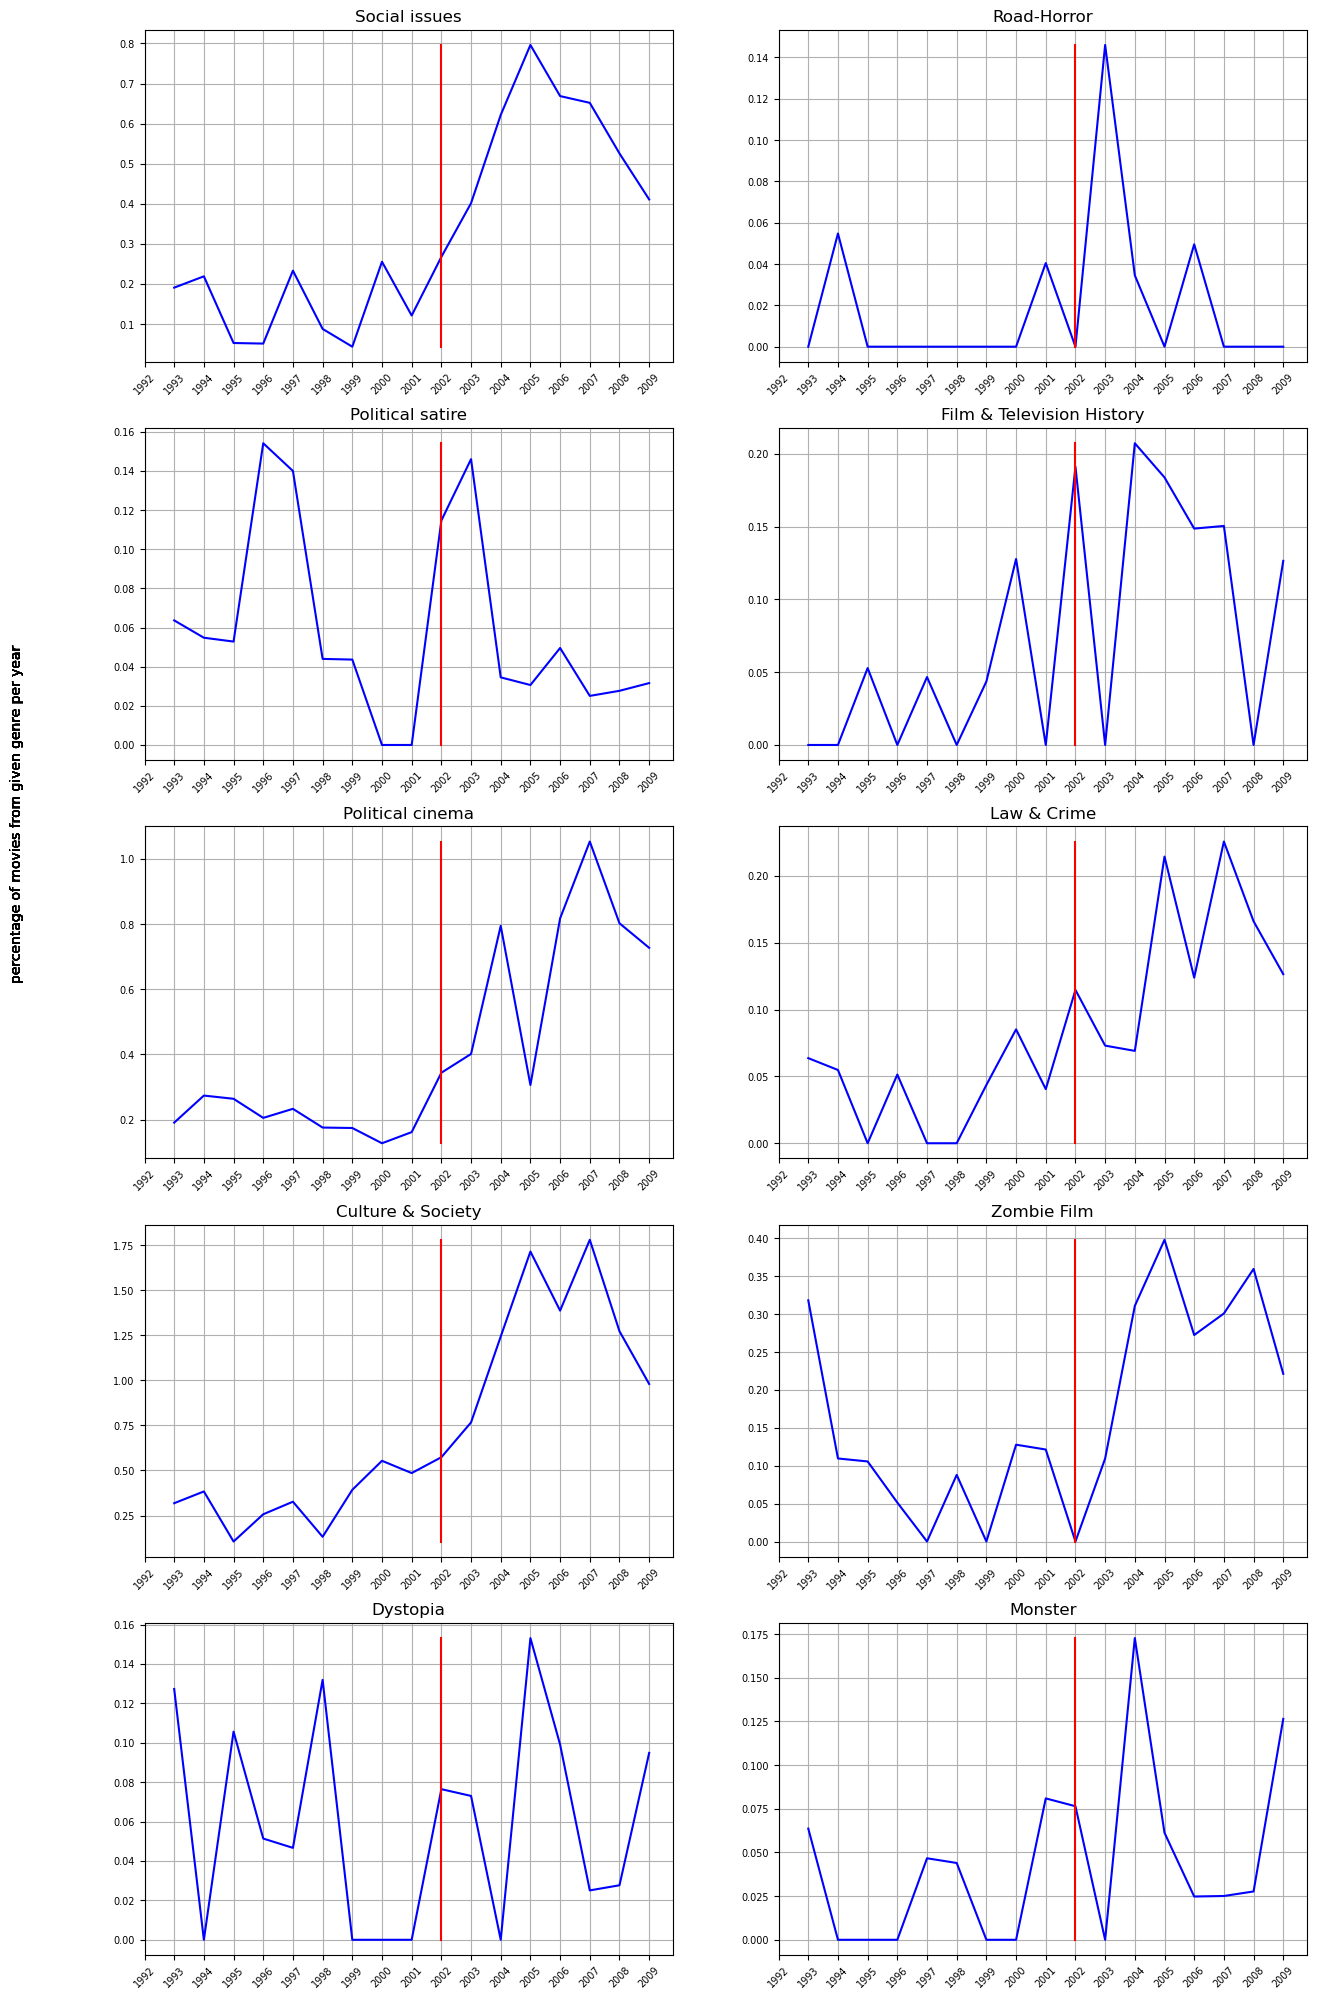

In [9]:
df = get_movies_genre_change(us_movies, genres_unique, 10, 1997,  2002,2006)
#genres =['Social issues','Road-Horror','Political cinema','Political satire', 'Law & Crime','Illnesses & Disabilities','Holiday Film','Social problem film','Glamorized Spy Film','Swashbuckler films','Dystopia', 'Documentary']
plot_percentage_movies_genre_all(us_movies,genres,1992, 2010, 2002,5,2)

We notice an upward trend in the social issues genre after 2002. A similar pattern appears in political cinema, where the trend shifts from a decrease to an increase. Additionally, the road horror genre shows a peak after 2002

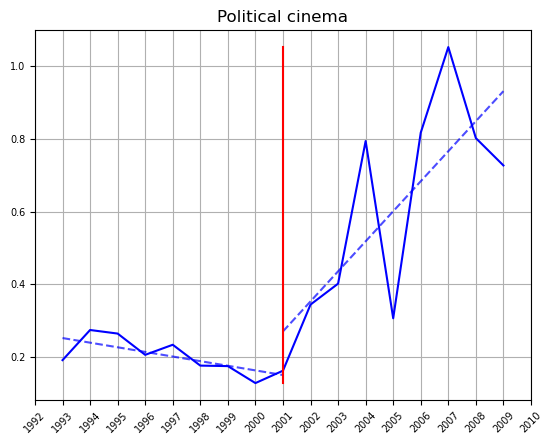

In [10]:
# linear regression for political cinema
linear_regression_plot(us_movies,1992,2010,2001,"Political cinema")



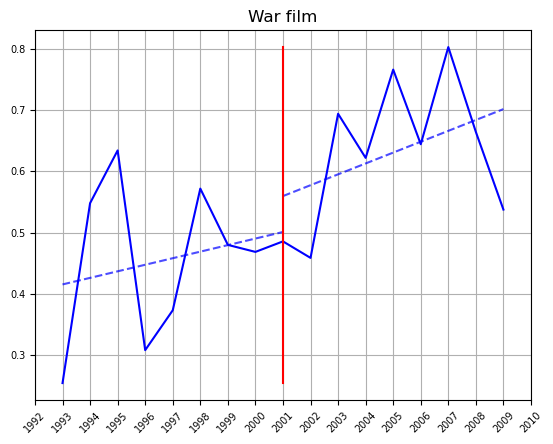

In [11]:
# linear regression for political cinema
linear_regression_plot(us_movies,1992,2010,2001,"War film")



# Non US movies

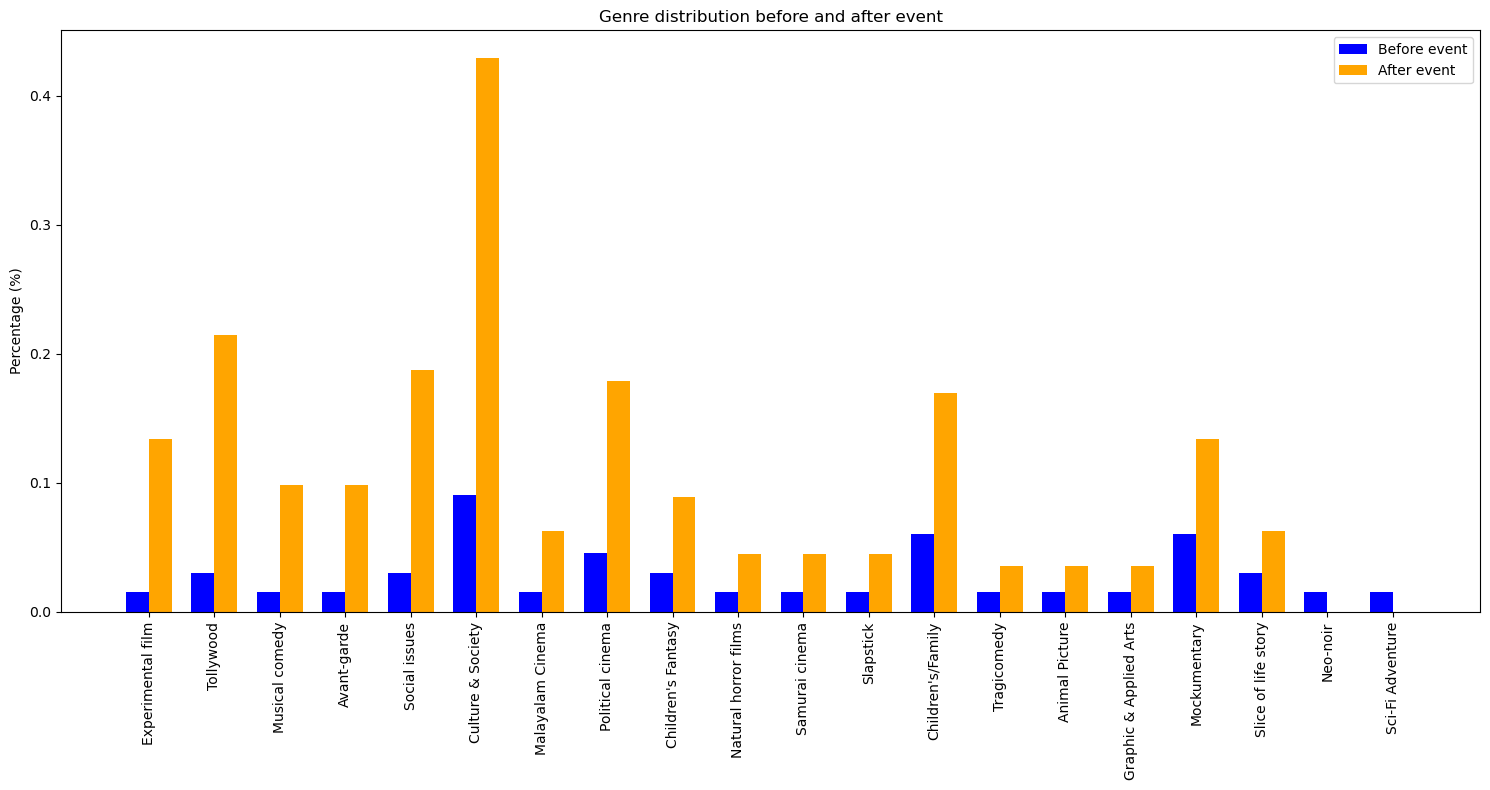

In [13]:
df = get_movies_genre_change(nonus_movies, genres_unique, 20, 1997,  2002,2006)
plot_movies_genre_change(df)

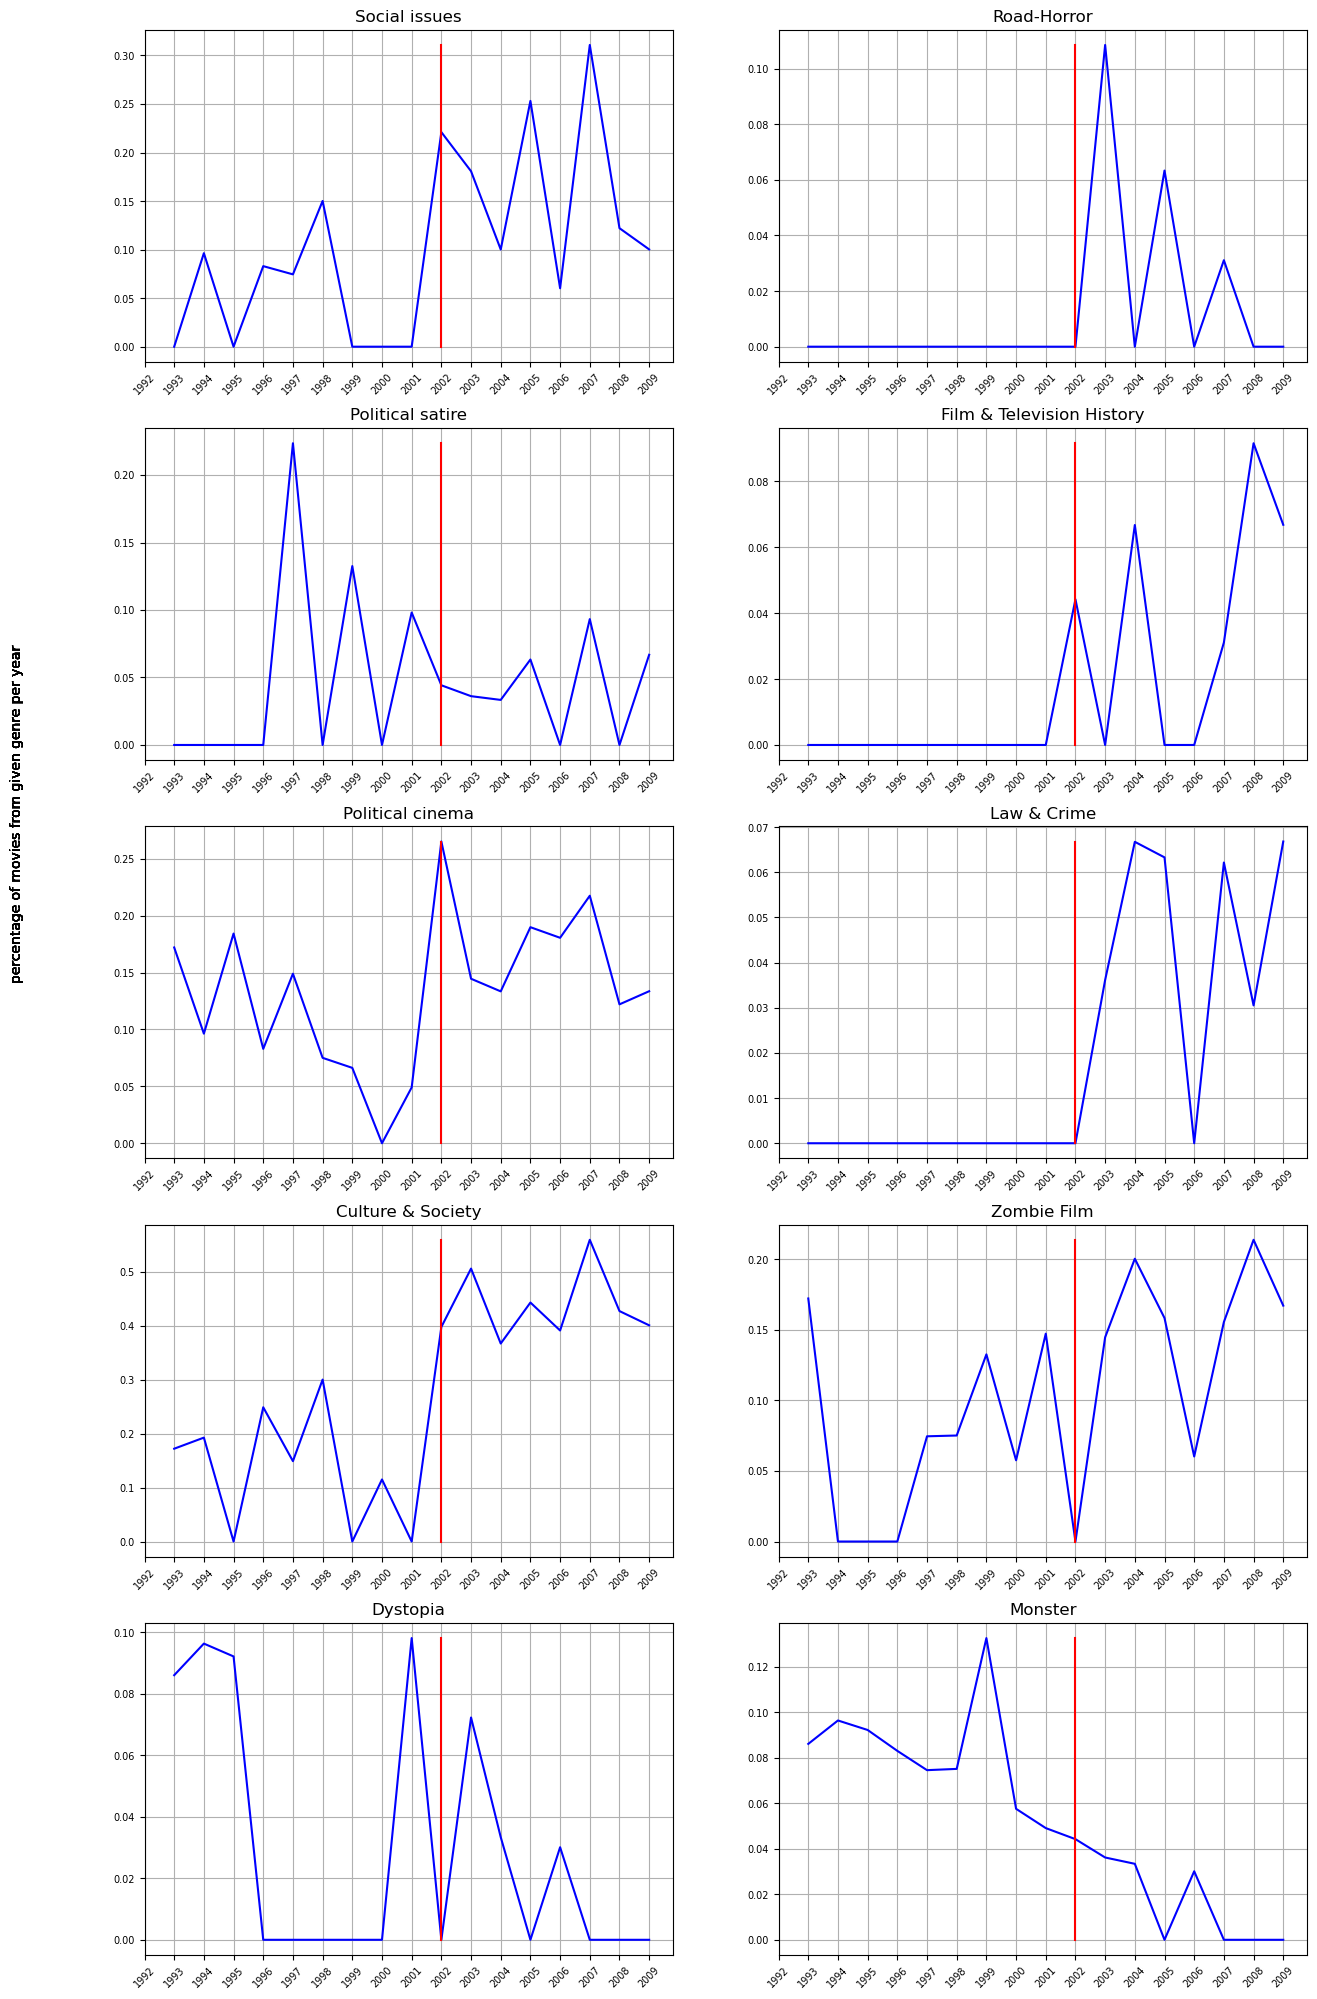

In [14]:
df = get_movies_genre_change(nonus_movies, genres_unique, 10, 1997,  2002,2006)
#genres =['Social issues','Road-Horror','Political cinema','Political satire', 'Law & Crime','Illnesses & Disabilities','Holiday Film','Social problem film','Glamorized Spy Film','Swashbuckler films','Dystopia', 'Documentary']
plot_percentage_movies_genre_all(nonus_movies,genres,1992, 2010, 2002,5,2)

We observe that the 20 genres with the highest changes are not completely identical between the U.S. and the rest of the world. Additionally, examining the time series for each genre studied in the U.S., we see that genres like political cinema, for example, show different trends in variation when compared to their counterparts outside the U.S.

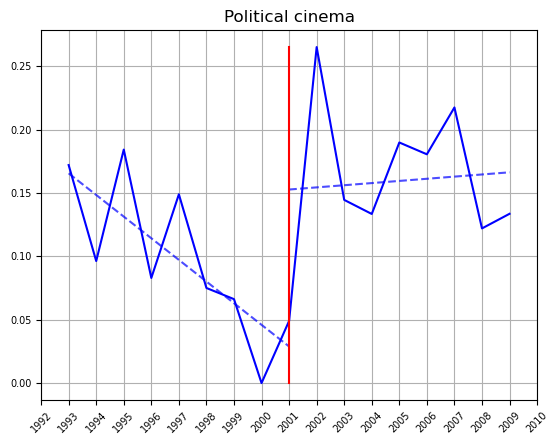

In [15]:
# linear regression for political cinema
linear_regression_plot(nonus_movies,1992,2010,2001,"Political cinema")



The impact is more pronounced for non-U.S. countries, with a sharp peak followed by a decrease. This could be due to the significant impact of the 2001 event, but the long-term effect on non-U.S. countries may be less important

### split rest of the worlds into continents

In [16]:
# Example usage
genres = ['Social issues', 'Film & Television History','Political cinema', 'War film']
plot_per_continent(movies,1990, 2010,  2001,'War film')


In [17]:
# import plotly.express as px
# import pandas as pd


# world_data = continent_data(movies)
# df = get_country_dataset(world_data,1930, 1950,  1940,'War film')


# # Melt the DataFrame to long format
# long_df = pd.melt(df, id_vars=['Year'], value_vars=['North_America', 'Europe', 'Asia'],
#                   var_name='Continent', value_name='Value')


# continent_to_countries = {
#     "North_America": [
#     "CAN", "MEX", "USA", "BLZ", "CRI", "DMA", "GRD", "GTM", "HND", "JAM", 
#     "KNA", "LCA", "VCT", "TTO", "BHS", "CUB", "BVI", "MSR", "SPM", "PRI"
# ],
#     "Europe": [
#     "ALB", "AND", "AUT", "BLR", "BEL", "BIH", "BGR", "HRV", "CYP", "CZE",
#     "DNK", "EST", "FIN", "FRA", "DEU", "GRC", "HUN", "ISL", "IRL", "ITA",
#     "LVA", "LIE", "LTU", "LUX", "MLT", "MDA", "MCO", "MNE", "NLD", "MKD",
#     "NOR", "POL", "PRT", "ROU", "RUS", "SMR", "SRB", "SVK", "SVN", "ESP",
#     "SWE", "CHE", "TUR", "UKR", "GBR", "VAT"
# ],
#     "Asia": [
#     "AFG", "ARM", "AZE", "BGD", "BRN", "BTN", "KHM", "CHN", "CYP", "GEO", 
#     "IND", "IDN", "IRN", "IRQ", "ISR", "JPN", "JOR", "KAZ", "KOR", "KWT", 
#     "KGZ", "LAO", "LBN", "MAC", "MYS", "NPL", "PAK", "PHL", "QAT", "SAU", 
#     "SGP", "LKA", "SYR", "TWN", "TJK", "THA", "TUR", "TKM", "ARE", "UZB", 
#     "VNM", "YEM"
# ],
# }

# # Expand the dataset
# expanded_rows = []
# for _, row in long_df.iterrows():
#     continent = row["Continent"]
#     if continent in continent_to_countries:
#         for country in continent_to_countries[continent]:
#             expanded_rows.append({
#                 "Year": row["Year"],
#                 "Continent": row["Continent"],
#                 "Value": row["Value"],
#                 "iso_alpha": country
#             })

# expanded_df = pd.DataFrame(expanded_rows)

# global_min = expanded_df['Value'].min()
# global_max = expanded_df['Value'].max()

# # Create the choropleth map
# fig = px.choropleth(expanded_df, 
#                     locations="iso_alpha", 
#                     color="Value", 
#                     hover_name="Continent",
#                     animation_frame="Year",
#                     projection="natural earth",
#                     range_color=[global_min, global_max])
# fig.show()



# Plot summaries analysis on 9/11

### We will inspect the plot of movies to detect any change in lexical fields w.r.t 9/11.

We first merge the movies and plot summaries datasets.

In [18]:

movies_and_plot = pd.merge(left=movies, right=plot_summaries, on='Wikipedia_movie_ID')
movies_and_plot.head()

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,nb_languages,nb_country,nb_genre,Movie_language,FirstLanguage_Name,SecondLanguage_Name,FirstCountry_Name,SecondCountry_Name,FirstContinent_name,SecondContinent_name,Plot
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24 00:00:00+00:00,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}",[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",1,1,7,[English ],English,None,United States of America,None,North America,None,"Set in the second half of the 22nd century, th..."
1,9363483,/m/0285_cd,White Of The Eye,1987-01-01 00:00:00+00:00,NaN,110.0,"{""/m/02h40lc"": ""English Language""}",[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",1,1,3,[English ],English,None,United Kingdom,None,Europe,None,A series of murders of rich young women throug...
2,261236,/m/01mrr1,A Woman in Flames,1983-01-01 00:00:00+00:00,NaN,106.0,"{""/m/04306rv"": ""German Language""}",[Germany],[Drama],1,1,1,[German ],German,None,Germany,None,Europe,None,"Eva, an upper class housewife, becomes frustra..."
3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002-01-01 00:00:00+00:00,NaN,86.0,"{""/m/02h40lc"": ""English Language""}",[South Africa],"[Family Film, Fantasy, Adventure, World cinema]",1,1,4,[English ],English,None,South Africa,None,Africa,None,"Every hundred years, the evil Morgana returns..."
4,6631279,/m/0gffwj,Little city,1997-04-04 00:00:00+00:00,NaN,93.0,"{""/m/02h40lc"": ""English Language""}",[United States of America],"[Romantic comedy, Ensemble Film, Comedy-drama,...",1,1,7,[English ],English,None,United States of America,None,North America,None,"Adam, a San Francisco-based artist who works a..."


Here are the words we are interested in. It can be modified to have more key words.

In [19]:
key_words = ['plane', 'tower', 'twin tower', 'terrorism', 'terrorist', 'hijack', 'islam', 'world trade center']
col_name_of_key_words = ['Count_of_' + '_'.join(word.split(' ')) for word in key_words]

In [20]:
# Count the number of occurences of key words in plot summary for each movie 
df_key_words_occ = count_key_words(movies_and_plots_df=movies_and_plot.copy(), key_words=key_words)
df_key_words_occ

,Count_of_plane,Count_of_tower,Count_of_twin_tower,Count_of_terrorism,Count_of_terrorist,Count_of_hijack,Count_of_islam,Count_of_world_trade_center,Count_movies
Movie_release_date,,,,,,,,,
1894.0,0,0,0,0,0,0,0,0,2
1895.0,0,0,0,0,0,0,0,0,1
1896.0,0,0,0,0,0,0,0,0,3
1898.0,0,0,0,0,0,0,0,0,5
1899.0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
2010.0,72,22,0,5,82,11,0,0,1060
2011.0,46,13,0,1,24,6,0,0,784
2012.0,41,9,0,2,25,8,0,0,530


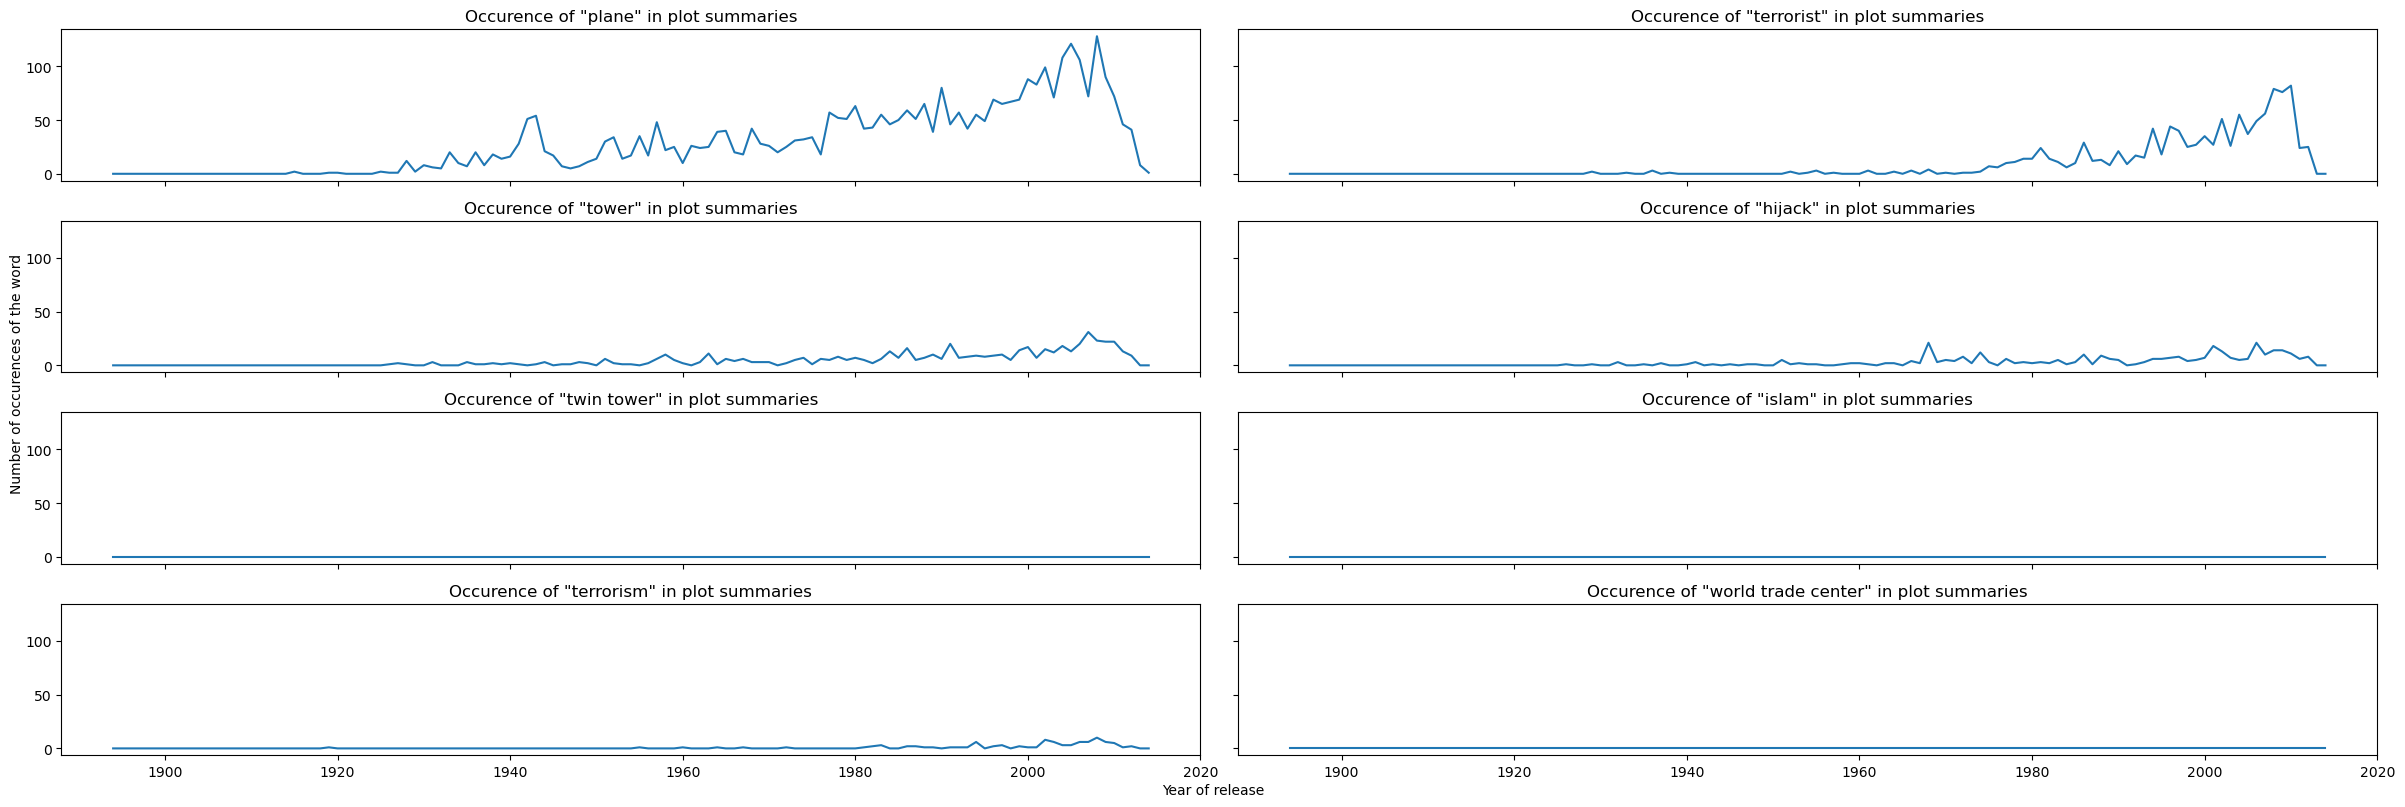

In [21]:
plot_key_words_occ(key_words_occ_df=df_key_words_occ, key_words=key_words)

Now we zoom in our period of interest.

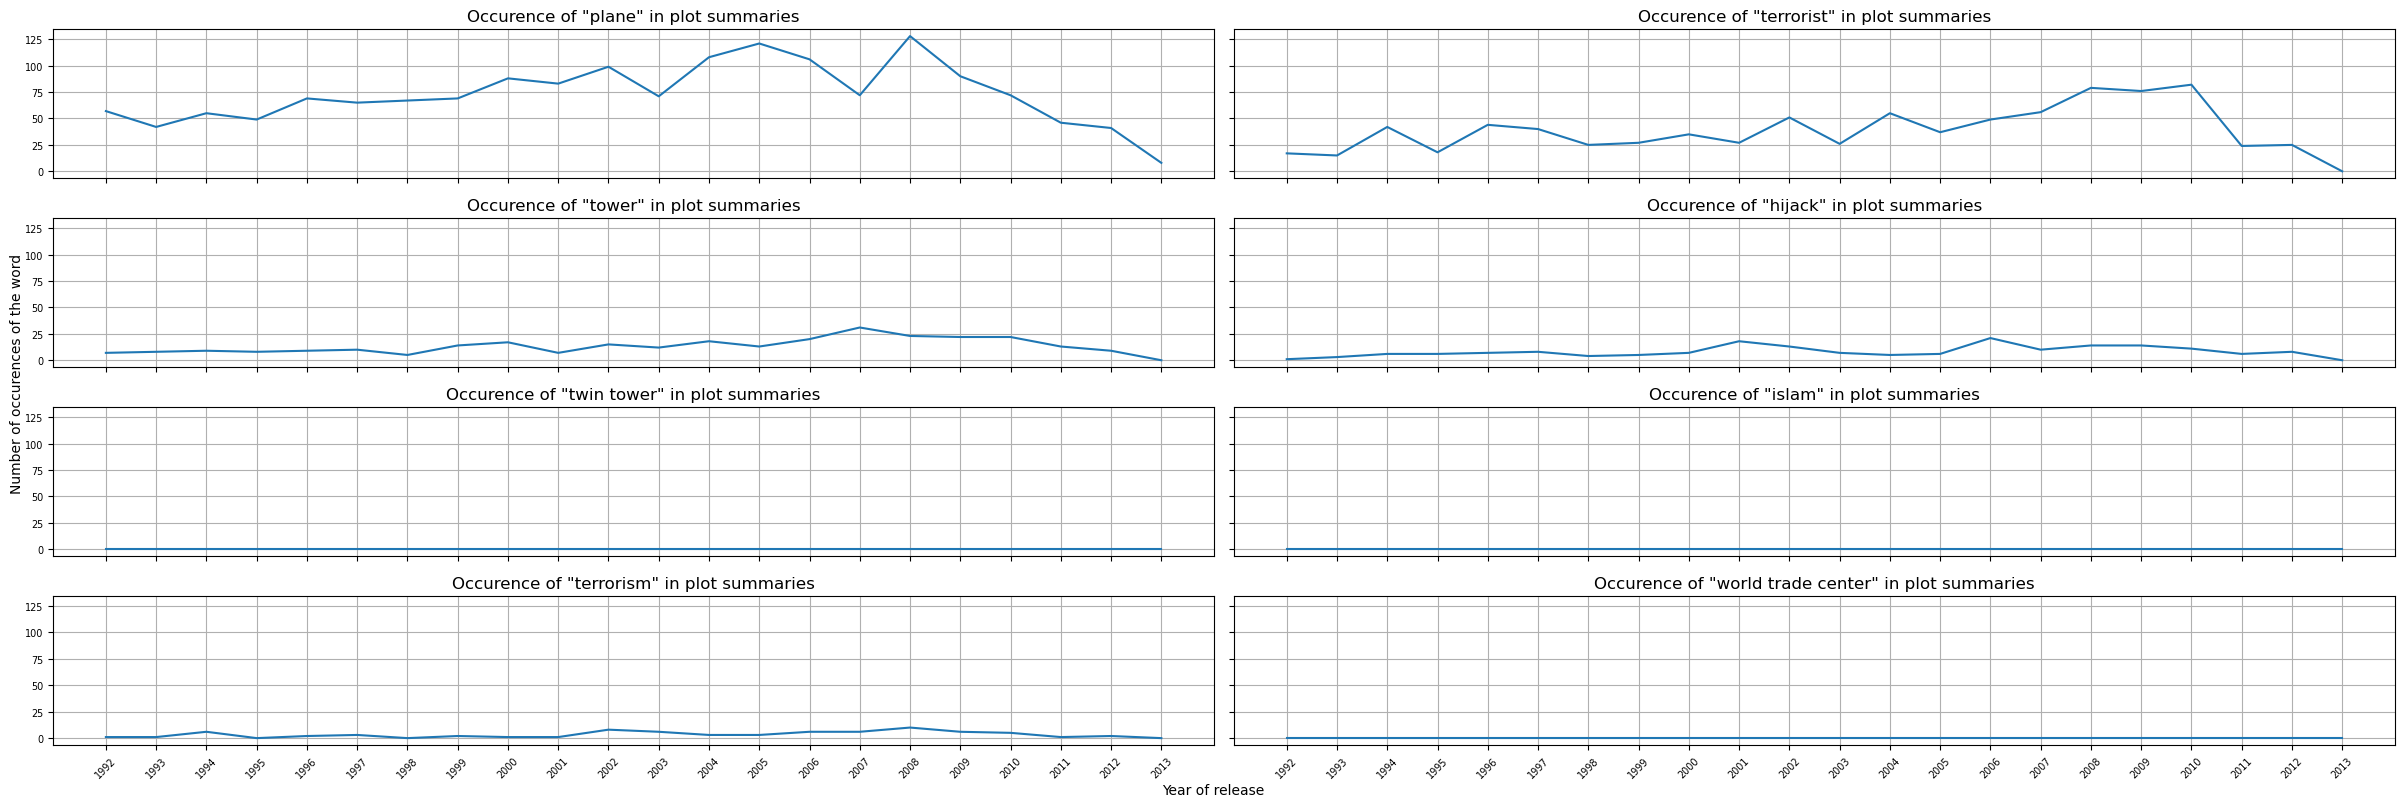

In [22]:
plot_key_words_occ_zoomed(key_words_occ_df=df_key_words_occ, key_words=key_words)

We can see that the word "terrorist" and "tower" were more frequent after 2002, but drops in 2010. We see that the words "terrorism", "islam", "world trade center" and "twin tower" are negligible. There is a peak for the word "hijack" in 2006 and then drops a bit.


Now by percentage !


In [23]:
df_key_words_occ_before_after = percentage_key_words_before_after(df_key_words_occ)
df_key_words_occ_before_after

,1992-2002,2003-2013
Count_of_plane,11.287%,7.962%
Count_of_tower,1.656%,1.688%
Count_of_twin_tower,0.0%,0.0%
Count_of_terrorism,0.38%,0.443%
Count_of_terrorist,5.18%,4.696%
Count_of_hijack,1.185%,0.941%
Count_of_islam,0.0%,0.0%
Count_of_world_trade_center,0.0%,0.0%



It is interesting to see that for the word "plane", it is less used after 9/11 than before, even though you would expect to have more.